In [1]:
%matplotlib inline  

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

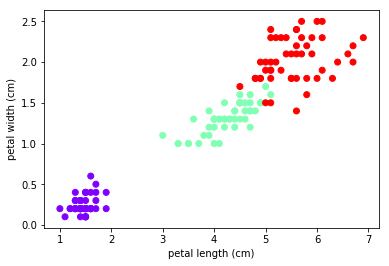

In [4]:
# grafica de clases por datos de petalos
X = iris_dataset.data[:, 2:]  # tomamos las primeras 2 features
Y = iris_dataset.target
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.rainbow, marker='o')
plt.xlabel(iris_dataset.feature_names[2])
plt.ylabel(iris_dataset.feature_names[3])

plt.show()

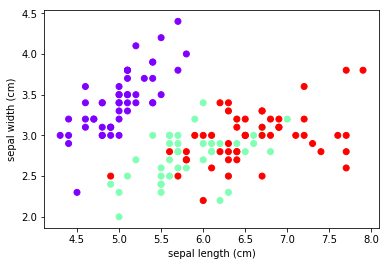

In [5]:
# grafica de clases por datos de sépalos
X = iris_dataset.data[:, :2] 
Y = iris_dataset.target
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.rainbow, marker='o')
plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])

plt.show()

In [6]:
feat_names = ['sepal_length','sepal_width','petal_length','petal_width']
d = pd.DataFrame(iris_dataset.data,
                 columns=feat_names)
t = pd.DataFrame(iris_dataset.target,
                 columns=['target'])
iris = pd.concat([d, t], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Arboles de decisión

Los [Arboles de Decision](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) son diagramas con construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.
Los [Arboles de Decision](https://es.wikipedia.org/wiki/%C3%81rbol_de_decisi%C3%B3n) están compuestos por nodos interiores, nodos terminales y ramas que emanan de los nodos interiores. Cada nodo interior en el árbol contiene una prueba de un atributo, y cada rama representa un valor distinto del atributo. Siguiendo las ramas desde el nodo raíz hacia abajo, cada ruta finalmente termina en un nodo terminal creando una segmentación de los datos.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#dividimos entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, stratify=iris_dataset.target, random_state=42)

#creamos el modelo
classifier = DecisionTreeClassifier(criterion="entropy")
print(classifier)

#entrenamos los datos
classifier.fit(X_train, y_train)

#Obtenemos el rendimiento
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Accuracy on training set: 1.000
Accuracy on test set: 0.921


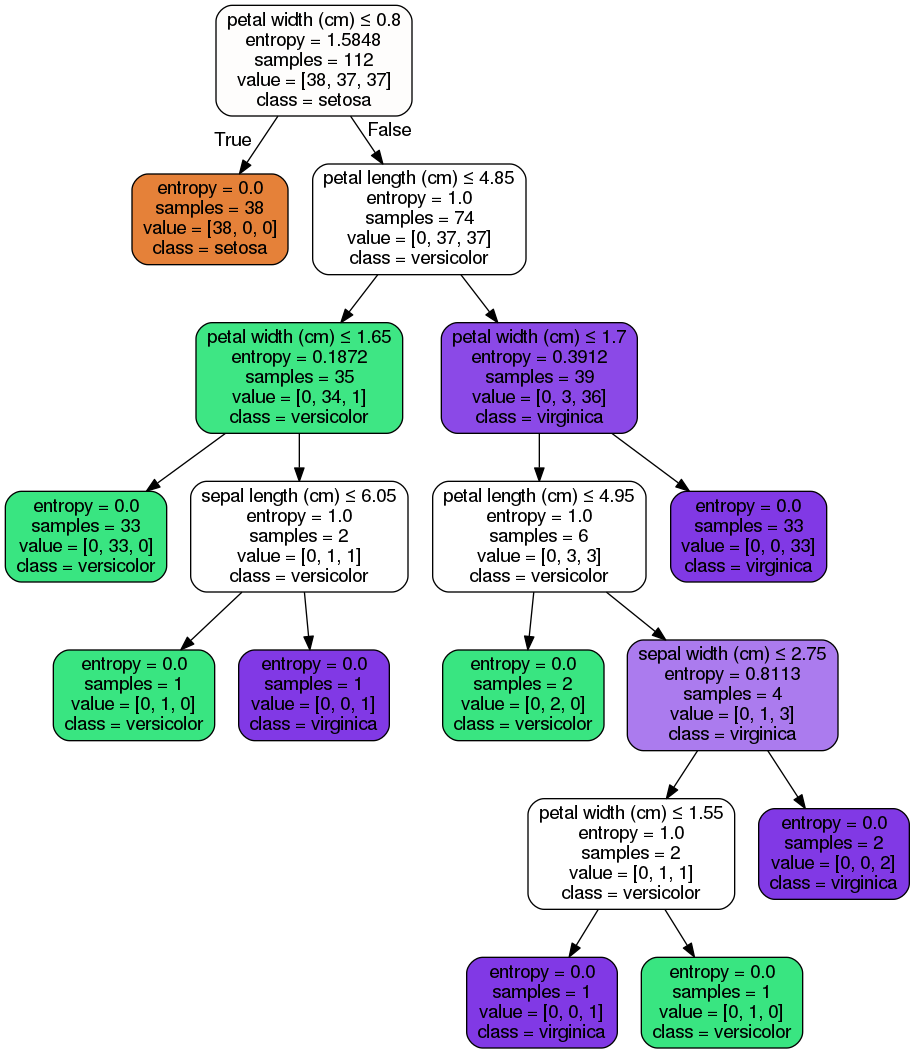

In [8]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO() 
export_graphviz(classifier, out_file=dot_data, feature_names=iris_dataset.feature_names,
               class_names=iris_dataset.target_names,
               filled=True,
               rounded=True,
               special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

graph.write_png('iris-tree.png') 
from IPython.core.display import Image 
Image(filename='iris-tree.png')

In [9]:
#feat_names = ['sepal_length','sepal_width','petal_length','petal_width']
classifier.predict ([[2, 1, 1, 4.6]])
print(iris_dataset.target_names[classifier.predict ([[2, 1, 1, 4.6]])])

['versicolor']


In [10]:
##feat_names = ['sepal_length','sepal_width','petal_length','petal_width']
classifier.predict ([[6.2, 3.4, 5.4, 2.3]])

print(iris_dataset.target_names[classifier.predict ([[6.2, 3.4, 5.4, 2.3]])])

['virginica']


In [11]:
##feat_names = ['sepal_length','sepal_width','petal_length','petal_width']
classifier.predict ([[6.2, 3.4, 5.4, 0.8]])

print(iris_dataset.target_names[classifier.predict ([[6.2, 3.4, 5.4, 0.8]])])

['setosa']


#### Importancia de características

In [12]:
print("Feature importances:\n{}".format(classifier.feature_importances_))

Feature importances:
[ 0.01126742  0.0070146   0.30954538  0.6721726 ]


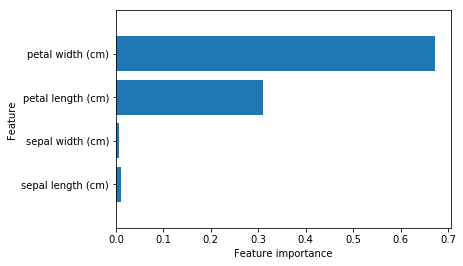

In [13]:
def plot_feature_importances_iris(model):
    n_features = iris_dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris_dataset.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_iris(classifier)

### El modelo es configurable. Por ejemplo, se puede limitar el nivel de profundidad

Accuracy on training set: 0.964
Accuracy on test set: 0.921


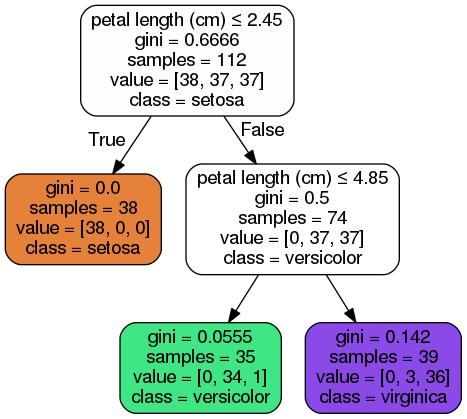

In [14]:
classifier = DecisionTreeClassifier(max_depth=2)

classifier.fit(X_train, y_train)

#Obtenemos el rendimiento para profundidad 2
print("Accuracy on training set: {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))

from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, feature_names=iris_dataset.feature_names,
               class_names=iris_dataset.target_names,
               filled=True,
               rounded=True,
               special_characters=True) 


graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris-tree2.png') 
from IPython.core.display import Image 
Image(filename='iris-tree2.png')

### Porcentaje clasificación en función de la profundidad del árbol

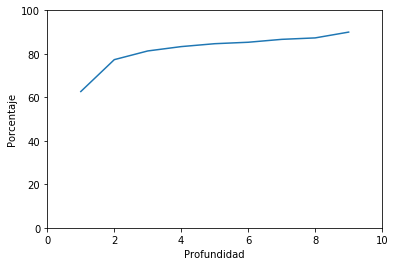

In [15]:
accs = []
for n in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=n)
    clf = clf.fit(X, Y)
    acc = sum(clf.predict (X) == Y) / len(Y) * 100
    accs.append(acc)

plt.plot(range(1, 10), accs)
plt.axis([0, 10, 0, 100])
plt.ylabel("Porcentaje")
plt.xlabel("Profundidad")
plt.show()


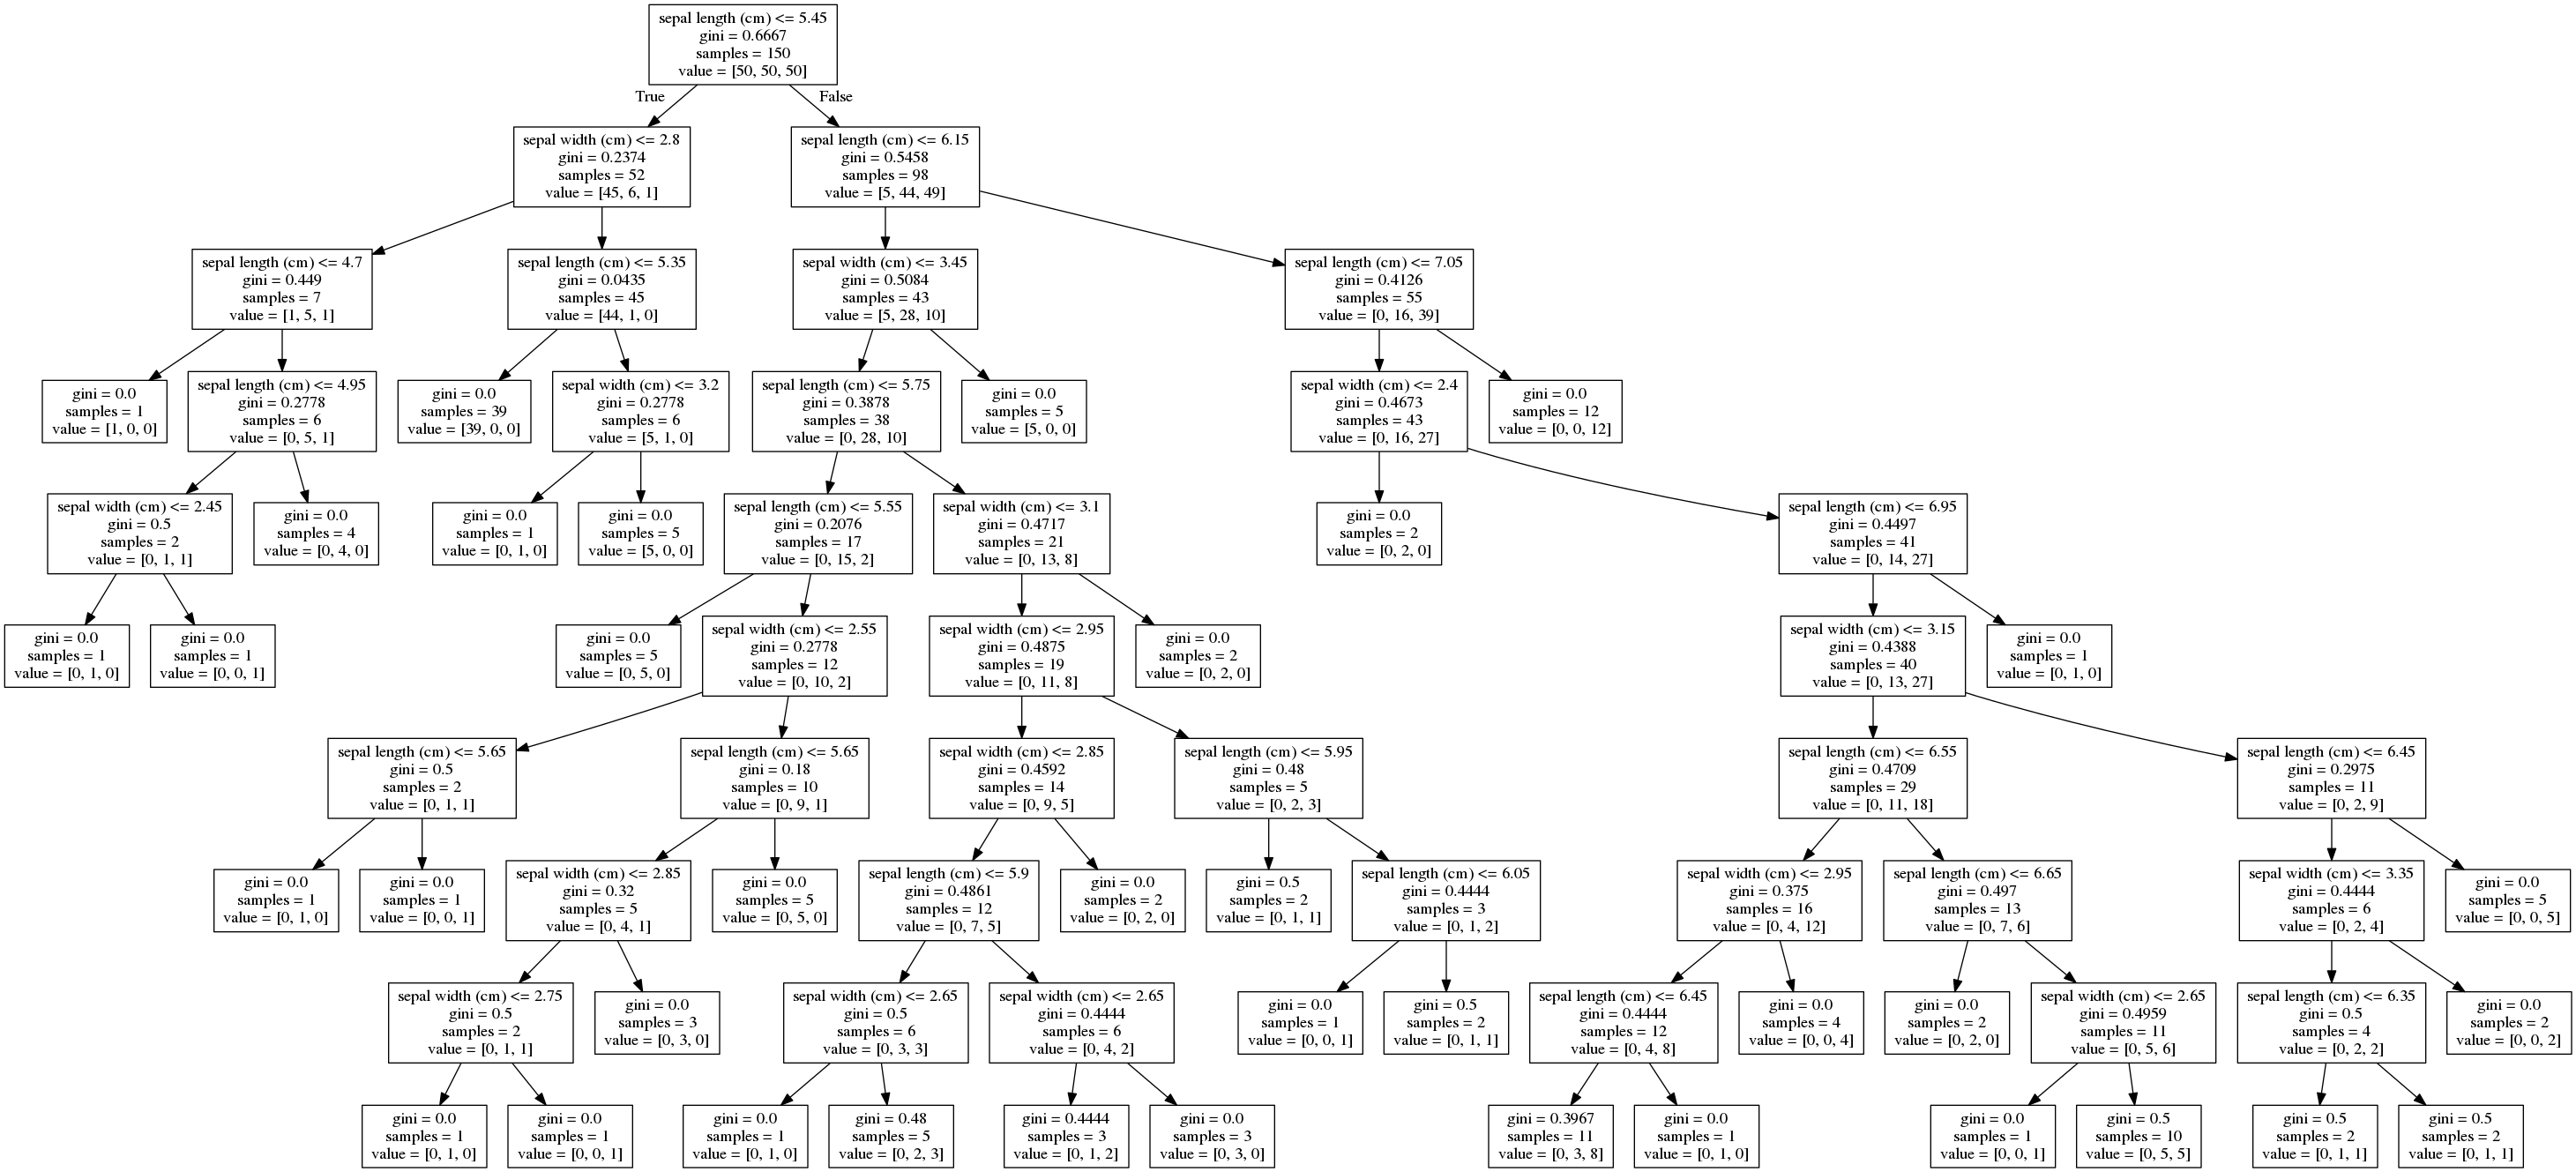

In [16]:
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, feature_names=iris_dataset.feature_names) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris1.png') 
from IPython.core.display import Image 
Image(filename='iris1.png')

##### Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.974


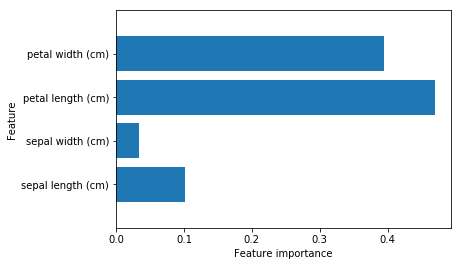

In [18]:
plot_feature_importances_iris(forest)